# Neural Translation models tests

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

In [ ]:
pip install git+https://github.com/huggingface/transformers

In [ ]:
pip install datasets

## Dataset to translate

In [2]:
from datasets import load_dataset

dataset = load_dataset("databricks/databricks-dolly-15k", split="train")

In [3]:
print(f'Number of prompts: {len(dataset)}')
print(f'Column names are: {dataset.column_names}')

Number of prompts: 15011
Column names are: ['instruction', 'context', 'response', 'category']


Each sample is a dictionary that contains:

- An **instruction**: What could be entered by the user, such as a question
- A **context**: Help to interpret the sample
- A **response**: Answer to the instruction
- A **category**: Classify the sample between Open Q&A, Closed Q&A, Extract information from Wikipedia, Summarize information from Wikipedia, Brainstorming, Classification, Creative writing

In [4]:
import random
import pandas as pd

# Generate random indices
nb_samples = 10
random_indices = random.sample(range(len(dataset)), nb_samples)
samples = []

for idx in random_indices:
    sample = dataset[idx]
    
    sample_data = {
        'instruction': sample['instruction'],
        'context': sample['context'],
        'response': sample['response'],
        'category': sample['category']
    }
    samples.append(sample_data)

# Create a DataFrame and display it
df = pd.DataFrame(samples)      
display(df)

,instruction,context,response,category
0,Extract the awards that Bob Sanders gained thr...,"Demond ""Bob"" Sanders (born February 24, 1981) ...",NFL Defensive Player of the Year in 2007,information_extraction
1,"My manager is available on Tuesday, Wednesday,...",,Your manager is available after 3 PM EST but h...,general_qa
2,Is pizza a healthy food or junk food?,,Pizza is very popular and each restaurant or c...,general_qa
3,What is the Azure equivalent of EKS?,,Microsoft Azure offers the Azure Kubernetes Se...,open_qa
4,How can teachers address health disparities in...,,The teacher works with children in the positiv...,general_qa
5,How can one loose weight,,There are several ways to shed some pounds whi...,general_qa
6,Who was given the Booker Prize 2020?,,Douglas Stuart,open_qa
7,Summarize the following paragraph about modern...,"Currently the cutting edge of fighter design, ...",Fifth-generation fighter jets take advantage o...,summarization
8,What were the best TV shows of 2022?,,The best television shows from 2022 (with the ...,brainstorming
9,Did automobiles exist prior to the invention o...,Development of the automobile started in 1672 ...,The first engines that were capable of enablin...,summarization


In [5]:
import matplotlib.pyplot as plt

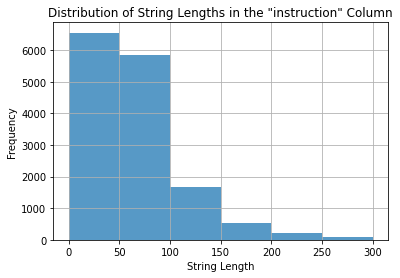

In [6]:
# Calculate the lengths of strings in the specified column ('text' in this case)
lengths = [len(str(x)) for x in dataset['instruction']]

# Display the distribution using a histogram
plt.hist(lengths, bins=[0,50,100,150,200,250,300], alpha=0.75)
plt.title('Distribution of String Lengths in the "instruction" Column')
plt.xlabel('String Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [7]:
# Count the number of lengths bigger than 500
len([length for length in lengths if length > 300]),len(lengths)

(121, 15011)

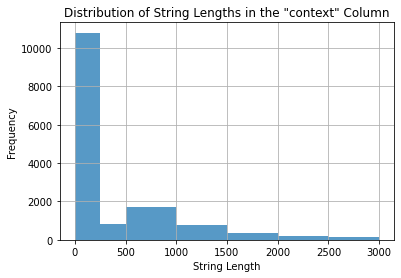

In [8]:
# Calculate the lengths of strings in the specified column
lengths = [len(str(x)) for x in dataset['context']]

# Display the distribution using a histogram
plt.hist(lengths, bins=[0,250,500,1000,1500,2000,2500,3000], alpha=0.75)
plt.title('Distribution of String Lengths in the "context" Column')
plt.xlabel('String Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
# Count the number of lengths bigger than 3000
len([length for length in lengths if length > 3000]),len(lengths)

(234, 15011)

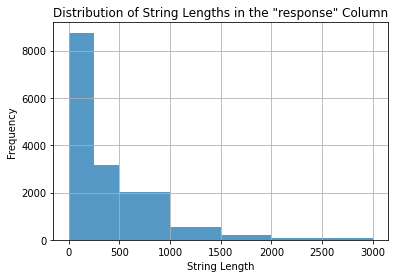

In [10]:
# Calculate the lengths of strings in the specified column
lengths = [len(str(x)) for x in dataset['response']]

# Display the distribution using a histogram
plt.hist(lengths, bins=[0,250,500,1000,1500,2000,2500,3000], alpha=0.75)
plt.title('Distribution of String Lengths in the "response" Column')
plt.xlabel('String Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [11]:
# Count the number of lengths bigger than 3000
len([length for length in lengths if length > 3000]),len(lengths)

(110, 15011)

## OPUS-MT

In [ ]:
pip install sacremoses # tokenizer

In [12]:
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM
import torch

#set the device
device = torch.cuda.current_device() if torch.cuda.is_available() else -1

In [13]:
#load the model
model_name_opusmt = 'Helsinki-NLP/opus-mt-en-fr'
model_opusmt = AutoModelForSeq2SeqLM.from_pretrained(model_name_opusmt)

#load the tokenizer
tokenizer_opusmt = AutoTokenizer.from_pretrained(model_name_opusmt, max_length=model_opusmt.config.max_length, truncation=True)

#create pipeline object
translator_opusmt = pipeline('translation', model=model_opusmt, tokenizer=tokenizer_opusmt, device=device)

In [14]:
model_opusmt.config.max_length

512

In [15]:
nb_samples = 10
random_indices = random.sample(range(len(dataset)), nb_samples)

instructions = []
contexts = []
responses = []

for idx in random_indices:
    sample = dataset[idx]    
    instructions.append(sample['instruction'])
    contexts.append(sample['context'])
    responses.append(sample['response'])

In [16]:
#get the translated sentence
instructions_fr = [d['translation_text'] for d in translator_opusmt(instructions)]

#display the translated sentence
for (instr_en,instr_fr) in zip(instructions,instructions_fr):
    print(instr_en, "=====>", instr_fr)

What is the national bird of New Zealand? =====> Quel est l'oiseau national de la Nouvelle-Zélande?
Describe what it's like in Breckenridge, Colorado =====> Décrivez ce que c'est à Breckenridge, Colorado
What are the two different continental tournaments that Roger Lemerre won ? =====> Quels sont les deux tournois continentaux que Roger Lemerre a gagnés ?
What were the horcruxes in the Harry Potter book series? =====> Quelles étaient les horreurs de la série de livres Harry Potter ?
What is the best kind of lightbulb? =====> Quel est le meilleur type d'ampoule ?
Extract all the years mentioned in this text, separated by a comma =====> Extrait toutes les années mentionnées dans ce texte, séparées par une virgule
How easy and safe is it to replace the brakes on your car by yourself? =====> Comment est-il facile et sûr de remplacer les freins sur votre voiture par vous-même?
What is nomadism? =====> Qu'est-ce que le nomadisme ?
Classify the following as living things and non-living things

In [17]:
#get the translated sentence
contexts_fr = [d['translation_text'] for d in translator_opusmt(contexts)]

#display the translated sentence
for (ctx_en,ctx_fr) in zip(contexts,contexts_fr):
    if len(ctx_en)>0:
        print(ctx_en, "=====>", ctx_fr)

In September 2002, the Tunisian Football Federation announced that it was finalizing a contract with former France manager Roger Lemerre. Tunisia hosted the 2004 African Cup of Nations, winning the group. They defeated Senegal in the quarter-finals, and Nigeria in the semi-finals. Tunisia built a 1–0 lead after four minutes with Mehdi Nafti's concentration pushed by Francileudo Santos, before Morocco levelled. Tunisia restored their lead, giving them their first African Cup of Nations title. They also won the CAF's African National Team of the Year award. Lemerre became the first manager to win two different continental tournaments, having previously won Euro 2000 with France.

As a result, Tunisia qualified for the 2005 FIFA Confederations Cup in Germany, playing the hosts, Argentina and Australia. The only points they would win was a victory over Australia. Before their 2006 World Cup appearance, Lemerre took the Tunisians to a training camp in Switzerland, where they played internat

In [18]:
#get the translated sentence
responses_fr = [d['translation_text'] for d in translator_opusmt(responses)]

#display the translated sentence
for (resp_en,resp_fr) in zip(responses,responses_fr):
    print("---\n",resp_en, "\n===\n", resp_fr)

---
 The kiwi bird is the national bird of New Zealand.  This bird is particularly interesting because it cannot fly and it runs very fast.  If you see one in person consider yourself lucky because sightings are rare during the day and in highly populated areas.  It also has strong legs and no tail.  New Zealanders adore this bird and often refer to it as the 'humble kiwi.' 
===
 L'oiseau kiwi est l'oiseau national de la Nouvelle-Zélande. Cet oiseau est particulièrement intéressant parce qu'il ne peut pas voler et il court très vite. Si vous le voyez en personne vous considérez chanceux parce que les observations sont rares pendant la journée et dans des zones très peuplées. Il a aussi des jambes fortes et pas de queue.
---
 Breckenridge, Colorado is largely known for its ski resort of the same name. Breckenridge is one of the highest-altitude tourist destinations in the United States, at an elevation of approximately 9600 feet (or 2926 meters). It has a small year-round resident popul

In [22]:
batchds = dataset[0:10]

In [32]:
def translate_batch(batch):
    # This function receives a batch and translates the 'instruction' field
    result = {}
    for column in ["instruction","context","response"]:
        translations = translator_opusmt(batch[column], max_length=512, truncation=True)
        translated_text = [translation["translation_text"] for translation in translations]
        result[f"{column}_fr"] = translated_text
    return result

In [33]:
translate_batch(batchds)

{'instruction_fr': ['Quand Virgin Australia a-t-elle commencé à opérer ?',
  'Quelle est une espèce de poisson? Tope ou corde',
  'Pourquoi les chameaux peuvent - ils survivre longtemps sans eau?',
  "Les parents d'Alice ont trois filles: Amy, Jessy, et quel est le nom de la troisième fille?",
  'Quand Tomoaki Komorida est-il né ?',
  "Si j'ai plus de pièces au moment de l'impasse, ai-je gagné ?",
  "Vu un texte de référence sur Lollapalooza, où cela se passe-t-il, qui l'a commencé et qu'est-ce que c'est ?",
  "Qui a donné à l'ONU le terrain à New York pour construire leur QG",
  "Pourquoi le mobile est mauvais pour l'humain",
  'Qui était Jean Moïse Browning?'],
 'context_fr': ["Virgin Australia, le nom commercial de Virgin Australia Airlines Pty Ltd, est une compagnie aérienne basée en Australie. Il est la plus grande compagnie aérienne par la taille de la flotte à utiliser la marque Virgin. Il a commencé les services le 31 août 2000 sous le nom de Virgin Blue, avec deux avions sur u

In [ ]:
chunked_dataset = dataset.map(translate_batch, batched=True, batch_size=32)